# Full workflow with CLI scripts

This notebook demonstrates how to:
1. Compile the Cython extension
2. Run adaptive benchmark via `evaluate.py`
3. Compare results via `methods.py`
4. Plot speed-ups via `graphs.py`

In [ ]:
# Code to run on the terminal before : 
# rm -rf build/ dist/ *.egg-info
# python env.py build_ext --inplace
# pip install -e .

In [ ]:
# !pip install -r requirements.txt
# !pip install cma

In [1]:
%%bash
# Compile Cython extension
cd ../att_bench_lib
python build_att_ext.py build_ext --inplace
cd -

/Users/come/Desktop/ENSAE/Programmation-parallele-pour-le-machine-learning-/notebooks


python: can't open file '/Users/come/Desktop/ENSAE/Programmation-parallele-pour-le-machine-learning-/att_bench_lib/build_att_ext.py': [Errno 2] No such file or directory


In [ ]:
# Install project in editable mode
# pip install -e .

In [4]:
# Make sure the parent folder (where `src/` lives) is on sys.path
import sys
from pathlib import Path

# notebook file is in .../notebooks/, donc src/ est dans le parent
PROJECT_ROOT = Path().resolve().parent
sys.path.insert(0, str(PROJECT_ROOT))

print("Project root added to sys.path:", PROJECT_ROOT)

Project root added to sys.path: /Users/come/Desktop/ENSAE/Programmation-parallele-pour-le-machine-learning-


In [5]:
# Environment setup 

from src.benchmark.evaluate import run_benchmark
import numpy as np
import os

from pathlib import Path

# Determine project root (one level above notebooks/)
PROJECT_ROOT = Path().resolve().parent
OUTPUT = PROJECT_ROOT / "output"
OUTPUT.mkdir(exist_ok=True)

print("Writing CSVs into", OUTPUT)

Writing CSVs into /Users/come/Desktop/ENSAE/Programmation-parallele-pour-le-machine-learning-/output


In [6]:
# List of methods to compare
methods = ['random', 'hyperband', 'bayes', 'cmaes', 'bandit', 'doe']

for m in methods:
    print(f"\n=== Running method: {m} ===")
    run_benchmark(
        dims   =[2,4,8,16,32,64,128,256,512,1024],
        threads=[1,2,4,8],
        blocks =[8,16,32,64],
        dtypes =[np.float32, np.float64],
        method =m,
        max_iters=15,
        out_dir =str(OUTPUT)
    )


=== Running method: random ===

[INFO] Running dim=2, method=random


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.



[INFO] Running dim=4, method=random

[INFO] Running dim=8, method=random

[INFO] Running dim=16, method=random

[INFO] Running dim=32, method=random

[INFO] Running dim=64, method=random

[INFO] Running dim=128, method=random

[INFO] Running dim=256, method=random

[INFO] Running dim=512, method=random

[INFO] Running dim=1024, method=random

[INFO] Saved summary to /Users/come/Desktop/ENSAE/Programmation-parallele-pour-le-machine-learning-/output/random.csv

=== Running method: hyperband ===

[INFO] Running dim=2, method=hyperband

[INFO] Running dim=4, method=hyperband

[INFO] Running dim=8, method=hyperband

[INFO] Running dim=16, method=hyperband

[INFO] Running dim=32, method=hyperband

[INFO] Running dim=64, method=hyperband

[INFO] Running dim=128, method=hyperband

[INFO] Running dim=256, method=hyperband

[INFO] Running dim=512, method=hyperband

[INFO] Running dim=1024, method=hyperband

[INFO] Saved summary to /Users/come/Desktop/ENSAE/Programmation-parallele-pour-le-machin

In [8]:
from src.benchmark.methods import compare_results

base = 'random'
for m in methods:
    if m == base: 
        continue
    print(f"\n### Compare {base} vs {m}")
    df_cmp, stats = compare_results(
        str(OUTPUT/f'{base}.csv'),
        str(OUTPUT/f'{m}.csv'),
        key_cols=['dim'],
        name1=base,
        name2=m
    )
    print(stats)


### Compare random vs hyperband


┏━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┓
┃ dim  ┃      mean_random       ┃     mean_hyperband     ┃         delta          ┃   best    ┃
┡━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━┩
│  2   │ 1.059150000344289e-05  │ 2.5154299999030622e-05 │ 1.4562799995587733e-05 │  random   │
│  4   │ 3.1187599998361296e-05 │ 3.265009999608992e-05  │ 1.4624999977286252e-06 │  random   │
│  8   │ 1.0704199996780516e-05 │ 1.0725100003128318e-05 │ 2.0900006347802214e-08 │  random   │
│  16  │ 1.3891700007206964e-05 │ 1.381670000455415e-05  │ -7.500000265281415e-08 │ hyperband │
│  32  │ 2.4108400000955044e-05 │ 2.335840000000644e-05  │ -7.500000009486037e-07 │ hyperband │
│  64  │ 7.229579999545876e-05  │ 7.328749999828688e-05  │ 9.917000028281136e-07  │  random   │
│ 128  │   0.0003213584000008   │      0.0008850916      │   0.0005637331999992   │  random   │
│ 256  │   0.0063436667000019   │   0.002090129199999    │  -0.0042535375000029   │ hyperband │
│ 512  │   0.0071143957999964   │   0.0072800374999957   │ 0.00016564169999930007 │  random   │
│ 1024 │   0.0333825457999978   │   0.0327571416000068   │ -0.000625404199990999  │ hyperband │
└──────┴────────────────────────┴────────────────────────┴────────────────────────┴───────────┘

[INFO] Saved summary to 
/Users/come/Desktop/ENSAE/Programmation-parallele-pour-le-machine-learning-/output/summary_random_vs_hyperband.csv

{'total_cases': 10, 'random_wins': 6, 'hyperband_wins': 4, 'ties': 0, 'pct_random': 60.0, 'pct_hyperband': 40.0, 'pct_ties': 0.0, 'avg_delta': -0.00041333538999965087}

### Compare random vs bayes


┏━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃ dim  ┃      mean_random       ┃       mean_bayes       ┃         delta          ┃  best  ┃
┡━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│  2   │ 1.059150000344289e-05  │ 1.0062700002322344e-05 │ -5.288000011205457e-07 │ bayes  │
│  4   │ 3.1187599998361296e-05 │ 1.0262500001090305e-05 │ -2.092509999727099e-05 │ bayes  │
│  8   │ 1.0704199996780516e-05 │ 1.1008599997808233e-05 │ 3.0440000102771693e-07 │ random │
│  16  │ 1.3891700007206964e-05 │ 1.4012299996579713e-05 │ 1.2059998937274873e-07 │ random │
│  32  │ 2.4108400000955044e-05 │ 2.7929300000550934e-05 │  3.82089999959589e-06  │ random │
│  64  │ 7.229579999545876e-05  │ 7.703770000375699e-05  │ 4.741900008298222e-06  │ random │
│ 128  │   0.0003213584000008   │   0.0009426585999989   │ 0.0006213001999981001  │ random │
│ 256  │   0.0063436667000019   │   0.0049521331999955   │ -0.0013915335000063995 │ bayes  │
│ 512  │   0.0071143957999964   │   0.0070538125000041   │ -6.058329999229957e-05 │ bayes  │
│ 1024 │   0.0333825457999978   │   0.0316661457999941   │ -0.0017164000000036983 │ bayes  │
└──────┴────────────────────────┴────────────────────────┴────────────────────────┴────────┘

[INFO] Saved summary to 
/Users/come/Desktop/ENSAE/Programmation-parallele-pour-le-machine-learning-/output/summary_random_vs_bayes.csv

{'total_cases': 10, 'random_wins': 5, 'bayes_wins': 5, 'ties': 0, 'pct_random': 50.0, 'pct_bayes': 50.0, 'pct_ties': 0.0, 'avg_delta': -0.00025596827000043946}

### Compare random vs cmaes


┏━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃ dim  ┃      mean_random       ┃       mean_cmaes       ┃          delta          ┃  best  ┃
┡━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│  2   │ 1.059150000344289e-05  │ 1.1416700004929226e-05 │  8.252000014863363e-07  │ random │
│  4   │ 3.1187599998361296e-05 │ 1.4570600001206913e-05 │ -1.6616999997154383e-05 │ cmaes  │
│  8   │ 1.0704199996780516e-05 │ 1.1049900004422853e-05 │  3.457000076423369e-07  │ random │
│  16  │ 1.3891700007206964e-05 │ 1.4370799999596783e-05 │  4.790999923898191e-07  │ random │
│  32  │ 2.4108400000955044e-05 │ 2.3524900004190383e-05 │ -5.834999967646615e-07  │ cmaes  │
│  64  │ 7.229579999545876e-05  │ 7.186260000082711e-05  │ -4.3319999463165546e-07 │ cmaes  │
│ 128  │   0.0003213584000008   │   0.000807716700001    │ 0.00048635830000019997  │ random │
│ 256  │   0.0063436667000019   │   0.0028219707999966   │   -0.0035216959000053   │ cmaes  │
│ 512  │   0.0071143957999964   │   0.0067908372999966   │ -0.0003235584999998001  │ cmaes  │
│ 1024 │   0.0333825457999978   │   0.0343977624000046   │  0.0010152166000068005  │ random │
└──────┴────────────────────────┴────────────────────────┴─────────────────────────┴────────┘

[INFO] Saved summary to 
/Users/come/Desktop/ENSAE/Programmation-parallele-pour-le-machine-learning-/output/summary_random_vs_cmaes.csv

{'total_cases': 10, 'random_wins': 5, 'cmaes_wins': 5, 'ties': 0, 'pct_random': 50.0, 'pct_cmaes': 50.0, 'pct_ties': 0.0, 'avg_delta': -0.00023596631999851314}

### Compare random vs bandit


┏━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃ dim  ┃      mean_random       ┃      mean_bandit       ┃          delta          ┃  best  ┃
┡━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│  2   │ 1.059150000344289e-05  │ 1.005010000199036e-05  │  -5.41400001452529e-07  │ bandit │
│  4   │ 3.1187599998361296e-05 │ 1.0216600003332132e-05 │ -2.0970999995029163e-05 │ bandit │
│  8   │ 1.0704199996780516e-05 │ 1.1045799993780747e-05 │  3.415999970002314e-07  │ random │
│  16  │ 1.3891700007206964e-05 │ 1.386250000336986e-05  │ -2.9200003837104644e-08 │ bandit │
│  32  │ 2.4108400000955044e-05 │ 2.3458400005438303e-05 │ -6.499999955167416e-07  │ bandit │
│  64  │ 7.229579999545876e-05  │ 7.189589998688462e-05  │ -3.9990000857414456e-07 │ bandit │
│ 128  │   0.0003213584000008   │   0.000696449999998    │   0.0003750915999972    │ random │
│ 256  │   0.0063436667000019   │   0.0023636375000023   │   -0.0039800291999996   │ bandit │
│ 512  │   0.0071143957999964   │   0.0092395876000011   │   0.0021251918000047    │ random │
│ 1024 │   0.0333825457999978   │   0.041285620800005    │  0.007903075000007205   │ random │
└──────┴────────────────────────┴────────────────────────┴─────────────────────────┴────────┘

[INFO] Saved summary to 
/Users/come/Desktop/ENSAE/Programmation-parallele-pour-le-machine-learning-/output/summary_random_vs_bandit.csv

{'total_cases': 10, 'random_wins': 4, 'bandit_wins': 6, 'ties': 0, 'pct_random': 40.0, 'pct_bandit': 60.0, 'pct_ties': 0.0, 'avg_delta': 0.0006401079300002097}

### Compare random vs doe


┏━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃ dim  ┃      mean_random       ┃        mean_doe        ┃          delta          ┃  best  ┃
┡━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│  2   │ 1.059150000344289e-05  │ 1.035409999303738e-05  │ -2.3740001040550885e-07 │  doe   │
│  4   │ 3.1187599998361296e-05 │ 1.021269999910146e-05  │ -2.0974899999259837e-05 │  doe   │
│  8   │ 1.0704199996780516e-05 │ 1.0966899992581602e-05 │  2.626999958010866e-07  │ random │
│  16  │ 1.3891700007206964e-05 │ 1.4150100003007538e-05 │ 2.5839999580057406e-07  │ random │
│  32  │ 2.4108400000955044e-05 │ 2.3500200001080884e-05 │ -6.081999998741601e-07  │  doe   │
│  64  │ 7.229579999545876e-05  │ 7.152510000878465e-05  │ -7.706999866741144e-07  │  doe   │
│ 128  │   0.0003213584000008   │   0.000280479099996    │ -4.087930000479999e-05  │  doe   │
│ 256  │   0.0063436667000019   │   0.0013131499999985   │ -0.0050305167000033995  │  doe   │
│ 512  │   0.0071143957999964   │   0.0062531291999846   │ -0.0008612666000118001  │  doe   │
│ 1024 │   0.0333825457999978   │   0.0339491544000054   │  0.0005666086000076023  │ random │
└──────┴────────────────────────┴────────────────────────┴─────────────────────────┴────────┘

[INFO] Saved summary to 
/Users/come/Desktop/ENSAE/Programmation-parallele-pour-le-machine-learning-/output/summary_random_vs_doe.csv

{'total_cases': 10, 'random_wins': 3, 'doe_wins': 7, 'ties': 0, 'pct_random': 30.0, 'pct_doe': 70.0, 'pct_ties': 0.0, 'avg_delta': -0.0005388124100017009}


In [10]:
# Multi-method comparison in one table
from src.benchmark.methods import compare_all_methods

csv_map = {
    m: str(OUTPUT / f"{m}.csv")
    for m in methods
}

# Merge them all and pick the best per dimension
df_multi = compare_all_methods(csv_map, key_cols=['dim'])
df_multi

,dim,mean_random,mean_hyperband,mean_bayes,mean_cmaes,mean_bandit,mean_doe,best_method
0,2,0.000011,0.000025,0.000010,0.000011,0.000010,0.000010,bandit
1,4,0.000031,0.000033,0.000010,0.000015,0.000010,0.000010,doe
2,8,0.000011,0.000011,0.000011,0.000011,0.000011,0.000011,random
3,16,0.000014,0.000014,0.000014,0.000014,0.000014,0.000014,hyperband
4,32,0.000024,0.000023,0.000028,0.000024,0.000023,0.000024,hyperband
5,64,0.000072,0.000073,0.000077,0.000072,0.000072,0.000072,doe
6,128,0.000321,0.000885,0.000943,0.000808,0.000696,0.000280,doe
7,256,0.006344,0.002090,0.004952,0.002822,0.002364,0.001313,doe
8,512,0.007114,0.007280,0.007054,0.006791,0.009240,0.006253,doe
9,1024,0.033383,0.032757,0.031666,0.034398,0.041286,0.033949,bayes


CMAES Speed-ups


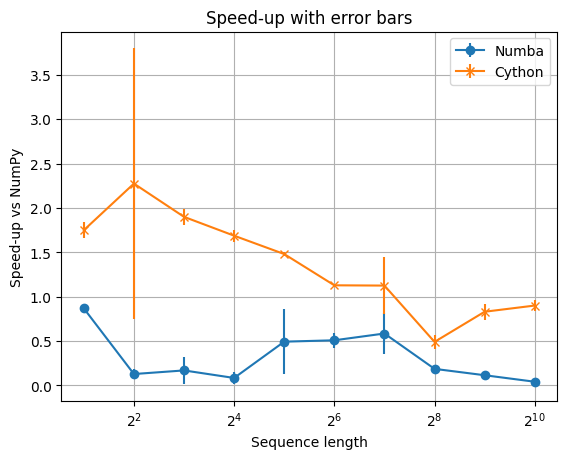

Bayes Speed-ups


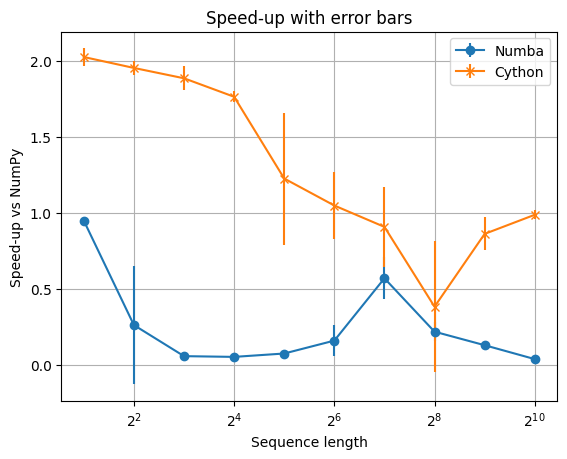

CMAES time


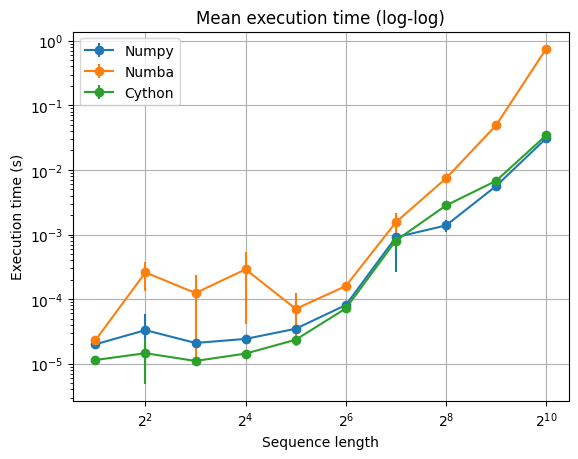

Bayes time


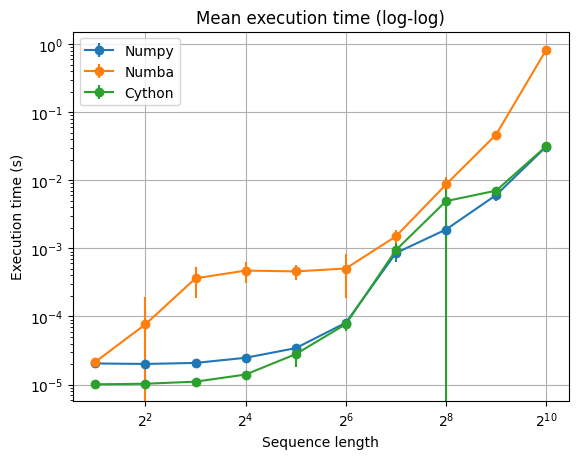

In [12]:
# Plot speed-ups and time : example of Bayes and CMAES
from src.benchmark.graphs import plot_speedups, plot_times

print("CMAES Speed-ups")
plot_speedups(str(OUTPUT / 'cmaes.csv'))
print("Bayes Speed-ups")
plot_speedups(str(OUTPUT / 'bayes.csv'))
print("CMAES time")
plot_times(str(OUTPUT / 'cmaes.csv'))
print("Bayes time")
plot_times(str(OUTPUT / 'bayes.csv'))

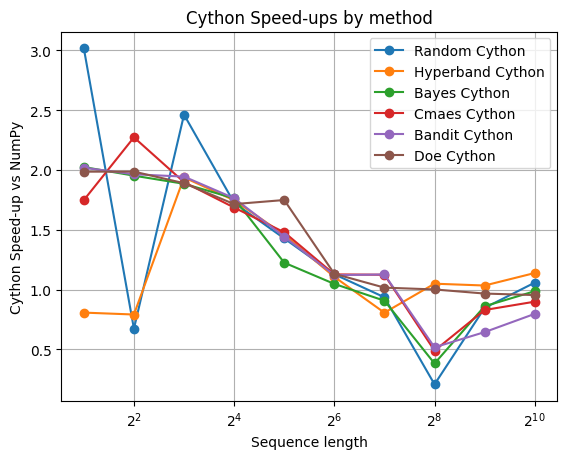

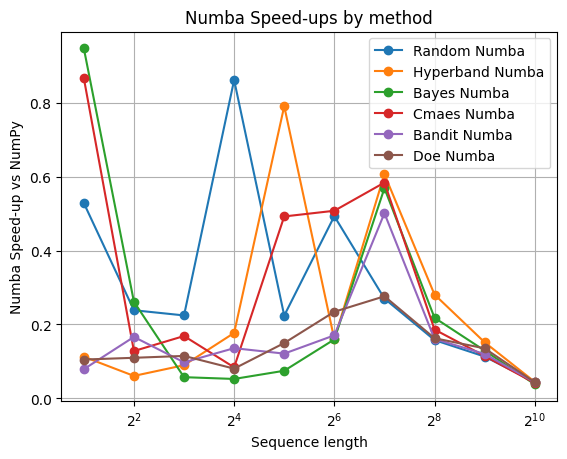

In [13]:
from src.benchmark.graphs import plot_multi_impl_speedups
import pandas as pd

csv_map = {m: str(OUTPUT / f"{m}.csv") for m in methods}

plot_multi_impl_speedups(csv_map, impl='cython')
plot_multi_impl_speedups(csv_map, impl='numba')

### Advanced indicators of efficiency 

In [15]:
from pathlib import Path

OUTPUT = Path().resolve().parent / "output"

records = []
for m in methods:
    csv_path = OUTPUT / f"{m}.csv"
    df = pd.read_csv(csv_path)
    for _, row in df.iterrows():
        records.append({
            'dim': row['dim'],
            'method': m,
            'threads': row['threads'],
            'efficiency_numba': row['speedup_numba'] / row['threads'],
            'efficiency_cython': row['speedup_cython'] / row['threads']
        })

df_eff = pd.DataFrame(records)


pivot_cython = df_eff.pivot(index='dim', columns='method', values='efficiency_cython')
pivot_numba  = df_eff.pivot(index='dim', columns='method', values='efficiency_numba')

print("Parallel efficiency (Cython):")
display(pivot_cython)

print("\nParallel efficiency (Numba):")
display(pivot_numba)

Parallel efficiency (Cython):


method,bandit,bayes,cmaes,doe,hyperband,random
dim,,,,,,
2,2.019472,1.012611,0.874456,0.993365,0.808172,0.754534
4,1.964939,0.976653,2.273688,0.248413,0.792243,0.084168
8,1.945300,1.885281,0.949475,0.236270,1.938602,0.307900
16,0.882326,1.763629,0.562193,1.715514,1.747595,0.215806
32,0.721396,0.612855,1.479824,0.874814,1.459325,0.178578
64,1.121645,1.048132,0.563866,0.566292,1.107168,0.141109
128,0.563498,0.453805,1.124631,1.016950,0.807426,0.468072
256,0.259043,0.382610,0.163394,0.125228,1.049927,0.104243
512,0.322520,0.430764,0.414956,0.967461,1.034675,0.847695



Parallel efficiency (Numba):


method,bandit,bayes,cmaes,doe,hyperband,random
dim,,,,,,
2,0.078822,0.474215,0.433827,0.052469,0.112509,0.132257
4,0.166230,0.130776,0.127981,0.013708,0.060549,0.029820
8,0.097371,0.057153,0.084332,0.014344,0.089591,0.028062
16,0.067867,0.052339,0.027923,0.080268,0.177018,0.107806
32,0.060490,0.037272,0.492779,0.074821,0.791586,0.028011
64,0.170556,0.159448,0.254076,0.117209,0.159842,0.061686
128,0.250727,0.284663,0.584556,0.276371,0.607234,0.135060
256,0.080376,0.218097,0.062075,0.020345,0.280997,0.078834
512,0.060031,0.064586,0.057268,0.135194,0.151676,0.113010
